# CNN
* feature extraction (특징을 뽑아냄)
 * Convolution
 * SubSampling(Pooling)
* Classification (Fully Connected Network)

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(1, 3, 3, 1)


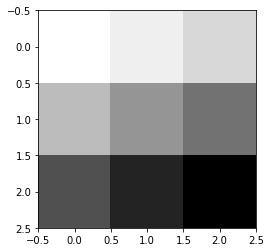

In [5]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]],
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap="Greys")

# Simple convolution layer
* image : (1, 3, 3, 1)
* filter : (2, 2, 1, 1)
* stride : (1, 1)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
(1, 2, 2, 1) (1, 2, 2, 1)


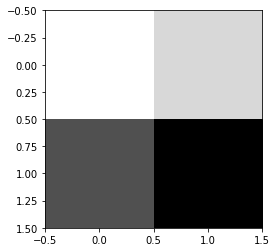

In [8]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print(conv2d_img.shape, conv2d_img.shape)
plt.imshow(conv2d_img.reshape(2, 2), cmap="Greys")

# Padding : SAME

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
(1, 3, 3, 1) (1, 3, 3, 1)


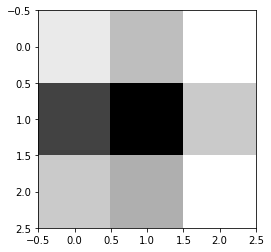

In [10]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img.shape, conv2d_img.shape)
plt.imshow(conv2d_img.reshape(3, 3), cmap="Greys")

# 3 Filters

In [14]:
print("image.shape", image.shape)
weight = tf.constant([[[[1., 10., -1.]], [[1., 10., -1.]]],
                      [[[1., 10., -1.]], [[1., 10., -1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print(conv2d_img.shape, conv2d_img.shape)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
(1, 3, 3, 3) (1, 3, 3, 3)


# Max Pooling

In [16]:
image = np.array([[[[4],[3]],
                   [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [17]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


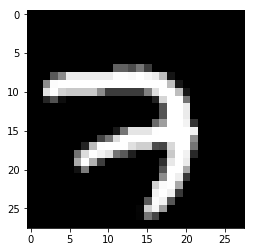

In [23]:
img = mnist.train.images[0].reshape(28, 28)
plt.imshow(img, cmap='gray')

# MNIST Convolution layer

Tensor("Conv2D_6:0", shape=(1, 14, 14, 5), dtype=float32)


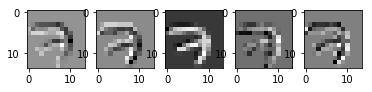

In [24]:
img = img.reshape(-1, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14, 14), cmap='gray')

# MNIST Max pooling

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


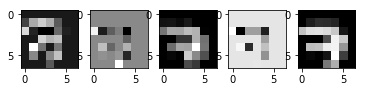

In [25]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')